# Financial Planning with APIs and Simulations

Create two financial analysis tools with a single Jupyter notebook:

1. Tool 1: A financial planner for *emergencies*. 
2. Tool 2: A financial planner for **retirement**. 

While the first tool is more an account summary page for all their held assets, the second tool forecasts portfolio performance.  The goal is to 1) allow the credit union members to visualize their current savings 2) see their portfolio's perspective performance in 30 yeaers 3) determine if they have enough reserves for an emergency fund.

In [85]:
# Import the required libraries and dependencies
import os
import re
from re import search
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

## FUNCTIONS

In [86]:
def API_CryptoCoinSetup(crypto_coins=dict):
    
    """
    The basic idea here is that whatever cypto symbol input
    this program will spit out the current $USD price. As the
    name indicates, an API will be used
    """
    
    coin_urls =[]
    coin_keys =[]
    api_dict  ={}
    
    for key in coin_dict:
        coin_keys = key+'_url'
        coin_urls = "https://api.alternative.me/v2/ticker/" + key + "/" +"?convert=USD"
        api_dict[coin_keys] = coin_urls
    
  
    return(api_dict)


In [87]:
def API_CryptoPrices(crypto_coins=dict,):
    
    """
    returns back 
    
    """
    
    # API USAGE: BTC AND ETH PRICE INFORMATION 
    # PART 1: Crypto API Call endpoint URLs for the held cryptocurrency assets
    # btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
    # eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
    
    btc_response
    eth_response

    for key in crypto_coins:
        if key == "Ethereum_url":
            eth_responce = requests.get(crypto_coins[key]).json()
        elif key == "Bitcoin_url":
            btc_responce = requests.get(crypto_coins[key]).json()

    # Use the json.dumps function to review the response data from the API call
    # NOTE: Indent and sort_keys parameters used for readability

    print(json.dumps(btc_response, indent=4, sort_keys=True))
    print("\n\n")
    print(json.dumps(eth_response, indent=4, sort_keys=True))
    print("\n\n")
    
    # Navigate the BTC response object to access the current price of BTC
    btc_price = btc_response['data']['1']['quotes']['USD']['price']

    # Print the current price of BTC
    eth_price = eth_response['data']['1027']['quotes']['USD']['price']
 
    return(eth_price, btc_price)   

In [159]:
def create_savings_df(idx=list,cols=list,data=list):
    
    personal_savings = pd.DataFrame(list(data),
              columns=cols)
    
    personal_savings['index'] = indx_list
    personal_savings = personal_savings.set_index('index')

    return(personal_savings)

In [51]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('app.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

**Aim**: Determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. Assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). Steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.
2. Use Requests library to get the current price (USD) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints.
3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.
4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.


## CODE

In [96]:
# 1. Need to know whart coins the Credit Union believes in
coin_dict ={'Ethereum':'ETH', 'Bitcoin':'BTC'}
key_iterable = coin_dict.keys()
key_list = list(key_iterable)

# 2. The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

# 3. The monthly amount for the member's household income
monthly_income = 12000

url_dict = API_CryptoCoinSetup(coin_dict)
url_list = list(url_dict.keys())
url_addresses = list(url_dict.values())

eth_price,btc_price = API_CryptoPrices(url_dict)

print(f"CALCULATIONS:")
eth_curr = "${:,.2f}".format(eth_price)
btc_curr = "${:,.2f}".format(btc_price)
print(f"1. The price of one Ethereum coin(USD): {eth_curr}")
print(f"2. The price of one Bitcoin coin(USD): {btc_curr}")


# Compute the current value of the BTC holding 
btc_value = (btc_price * btc_coins) 
btc_holding ="${:,.2f}".format(btc_value)
eth_value = (eth_price * eth_coins)
eth_holding="${:,.2f}".format(eth_value)

# Print current value of your holding in BTC
print(f"3. This is the value of your total BTC holding in USD: {btc_value}")
print(f"4. This is the value of your total ETH holding in USD: {eth_value}")


# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = (btc_value + eth_value)
crypto_wallet_balance = "${:,.2f}".format(total_crypto_wallet)

# Print current cryptocurrency wallet balance
print(f"5. This is the values of your total crypto wallet {crypto_wallet_balance}:")



{
    "data": {
        "1": {
            "circulating_supply": 19020025,
            "id": 1,
            "last_updated": 1650734380,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 757063604506,
                    "percent_change_1h": -0.411535096903784,
                    "percent_change_24h": 0.623025653082545,
                    "percent_change_7d": -2.04708590102934,
                    "percentage_change_1h": -0.411535096903784,
                    "percentage_change_24h": 0.623025653082545,
                    "percentage_change_7d": -2.04708590102934,
                    "price": 39756.0,
                    "volume_24h": 36091787992
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19020025,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

# Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

Determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). Complete the following steps:

1. Create an environment file (`.env`) to store your Alpaca API key and Alpaca secret key values.
2. Set the variables for the Alpaca API and secret keys. (Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object)
3. Set the following parameters for the Alpaca API call:
    - `tickers`: Use the tickers for the member’s stock and bond holdings.
    - `timeframe`: Use a time frame of one day.
    - `start_date` and `end_date`: Use the same date for these parametersv (`2020-08-07`).
4. Get the current closing prices for `SPY` & `AGG` by using the Alpaca `get_bars` function. Format response as a Pandas df
5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.
6. Calculate the value (USD) of the current amount of stocks and bond shares in the portfolio.


#### PORTFOLIO DETAILS AND ALPACA SDK SET-UP

In [106]:
## USING THE ALPACA SDK

# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

# Load the environment variables from the .env file
# (call the load_dotenv function)
load_dotenv('app.env')

# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### API Parameters

In [107]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Set the tickers for both the bond and stock portion of the portfolio
tickers= ['SPY','AGG']

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date to 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()



#### USING ALPACA'S `get_bars` FUNCTION FOR CLOSING PRICES

In [141]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# `df` property after the function

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

#display(df_portfolio.head())

# Reorganize the DataFrame
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY= df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
df_portfolio.index = df_portfolio.index.date

# Review the first 5 rows of the Alpaca DataFrame
#display(df_portfolio.head())

# Access the closing price for AGG from the Alpaca DataFrame
# Note: its cleaner and neater to just have a dataframe of closing prices 

df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

display(df_closing_prices.head())
print("\n")
print(df_closing_prices.dtypes)
print("\n\n")
# Saving `SPY` and `AGG` closing prices to variables
agg_close_price = df_closing_prices.iat[0, 0]
spy_close_price = df_closing_prices.iat[0, 1]

# Calculate the current value of the bond portion of the portfolio
agg_value = (agg_close_price * agg_shares)
spy_value = (spy_close_price * spy_shares)
total_stocks_bonds = agg_value + spy_value

# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
portfolio_val = total_stocks_bonds + total_crypto_wallet

# Just for show and fancy stylings
agg_close = "${:,.2f}".format(agg_close_price)
spy_close = "${:,.2f}".format(spy_close_price)
agg_val = "${:,.2f}".format(agg_value)
spy_val = "${:,.2f}".format(spy_value)
tot_holdings_val = "${:,.2f}".format(total_stocks_bonds)
tot_portfolio_val = "${:,.2f}".format(portfolio_val)


print("CALCULATIONS:")
print(f"1. This is the AGG Closing Price: {agg_close}")
print(f"2. This is the SPY Closing Price: {spy_close} ")
print(f"3. This is the Total Value of your AGG Holdings: {agg_val}")
print(f"4. This is the Total Value of your SPY Holdings: {spy_val}")
print(f"5. This is the Value of your AGG & SPY Holdings: {tot_holdings_val}")
print(f"5. This is the Value of your Crypto Wallet, Stocks & Bond Holdings: {tot_portfolio_val}")

,AGG,SPY
2020-08-07,119.43,334.57




AGG    float64
SPY    float64
dtype: object




CALCULATIONS:
1. This is the AGG Closing Price: $119.43
2. This is the SPY Closing Price: $334.57 
3. This is the Total Value of your AGG Holdings: $23,886.00
4. This is the Total Value of your SPY Holdings: $36,802.70
5. This is the Value of your AGG & SPY Holdings: $60,688.70
5. This is the Value of your Crypto Wallet, Stocks & Bond Holdings: $124,098.53


### Evaluate the Emergency Fund

**AIM: Use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. Steps**

1. Create a Python list named `savings_data`:
    - `saving_data[0]`: the total value of the cryptocurrency wallet. 
    - `saving_data[1]`: the total value of the stock and bond portions of the portfolio.
2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:
    - `savings_data`: Use the list that you just created.
    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.
    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.
3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio.
4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [160]:
# Consolidate financial assets data into a Python list
savings_data_list = []

cols_list = ['amount']
indx_list =['crypto','stock/bond']
savings_data = [total_stocks_bonds,portfolio_val]

# Review the Python list savings_data
print(savings_data)

# Create a Pandas DataFrame called savings_df 
savings_df = create_savings_df(indx_list,cols_list,savings_data)

# Display the savings_df DataFrame
print(savings_df)

[60688.7, 124098.52799999999]
                amount
index                 
crypto       60688.700
stock/bond  124098.528


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Asset Breakdown; Crypto & Stocks/Bonds Asset Valuation'}, ylabel='amount'>

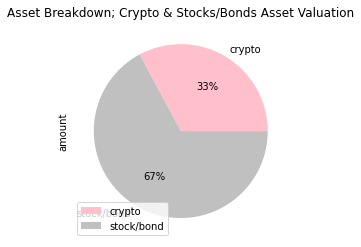

In [170]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
colors = ['pink', 'silver']
savings_pie_grph = savings_df.plot(kind='pie',
                y='amount',
                autopct='%1.0f%%', colors=colors,
                title='Asset Breakdown; Crypto & Stocks/Bonds Asset Valuation'
               )
savings_pie_grph

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [175]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3.00 * monthly_income


# Evaluate the possibility of creating an emergency fund with 3 conditions:
if portfolio_val > emergency_fund_value:
    print(f"Congratulations, You have enough money in this fund")
elif portfolio_val == emergency_fund_value:
    print(f"Congratulations!!! Your Total Portfolio value is equal to the amount designated for an emergency savings")
else:
    print(f"Congrats, you are only ${emergency_fund_value - tot_portfolio_val} away from your goal")


Congratulations, You have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [197]:
# Set start and end dates of 3 years back from your current date
start_date_mc = pd.Timestamp("2017-04-21", tz="America/New_York").isoformat()
end_date_mc = pd.Timestamp("2020-04-21", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
#limit_rows = 1000

In [207]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date_mc,
    end=end_date_mc,
    limit=limit_rows
).df

# Reorganize the DataFrame: Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

display(SPY.shape)
display(AGG.shape)

# Concatenate the ticker DataFrames
df_prices= pd.DataFrame()
df_prices= pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

display(df_prices.head())
display(df_prices.tail())

(98, 7)

(98, 7)

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.40  2143773   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2015-12-01 05:00:00+00:00       15562  108.754152  209.42  210.8200  209.1100   
2015-12-02 05:00:00+00:00       11581  108.684692  210.60  211.0000  208.2300   
2015-12-03 05:00:00+00:00       16801  108.040315  208.90  209.1500  204.7511   
2015-12-04 05:00:00+00:00        9796  108.192232  206.10  209.9700  205.9300   
2015-12-07 05:00:00+00:00        9104  108.460067  209.20  209.7295  207.2000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2015-12-01 05:00:00+00:00  210.68   97858418      337780  209.921410  
2015-12-02 05:00:00+00:00  208.54  108069059      367013  209.563055  
2015-12-03 05:00:00+00:00  205.58  166224154      546768  206.878936  
2015-12-04 05:00:00+00:00  209.66  192878747      556731  208.178631  
2015-12-07 05:00:00+00:00  208.27  102027111      374705  208.276128

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2016-04-15 04:00:00+00:00  110.80  110.98  110.750  110.95  1579648   
2016-04-18 04:00:00+00:00  110.91  110.95  110.790  110.94  2146193   
2016-04-19 04:00:00+00:00  110.94  111.00  110.770  110.93  2019189   
2016-04-20 04:00:00+00:00  111.02  111.03  110.604  110.66  2376076   
2016-04-21 04:00:00+00:00  110.52  110.62  110.450  110.51  2692797   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2016-04-15 04:00:00+00:00        9657  110.921389  208.00  208.1721  207.40   
2016-04-18 04:00:00+00:00       10803  110.851761  207.11  209.2800  207.00   
2016-04-19 04:00:00+00:00       11773  110.932164  209.70  210.2000  208.94   
2016-04-20 04:00:00+00:00       11319  110.798771  209.90  210.9200  209.39   
2016-04-21 04:00:00+00:00       10838  110.521580  210.13  210.2500  208.65   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2016-04-15 04:00:00+00:00  207.80  75761615      250856  207.854515  
2016-04-18 04:00:00+00:00  209.25  82530883      268230  208.623179  
2016-04-19 04:00:00+00:00  209.91  87907889      324657  209.689686  
2016-04-20 04:00:00+00:00  210.07  81015514      266771  210.152074  
2016-04-21 04:00:00+00:00  208.90  85473874      294905  209.439796

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [209]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirty_year.portfolio_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.40  2143773   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00       15562  108.754152          NaN  209.42   
2015-12-02 05:00:00+00:00       11581  108.684692    -0.001378  210.60   
2015-12-03 05:00:00+00:00       16801  108.040315    -0.007178  208.90   
2015-12-04 05:00:00+00:00        9796  108.192232     0.003244  206.10   
2015-12-07 05:00:00+00:00        9104  108.460067     0.001478  209.20   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2015-12-01 05:00:00+00:00  210.8200  209.1100  210.68   97858418      337780   
2015-12-02 05:00:00+00:00  211.0000  208.2300  208.54  108069059      367013   
2015-12-03 05:00:00+00:00  209.1500  204.7511  205.58  166224154      546768   
2015-12-04 05:00:00+00:00  209.9700  205.9300  209.66  192878747      556731   
2015-12-07 05:00:00+00:00  209.7295  207.2000  208.27  102027111      374705   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  209.921410          NaN  
2015-12-02 05:00:00+00:00  209.563055    -0.010158  
2015-12-03 05:00:00+00:00  206.878936    -0.014194  
2015-12-04 05:00:00+00:00  208.178631     0.019846  
2015-12-07 05:00:00+00:00  208.276128    -0.006630

In [210]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/comdrpaquiot/Desktop/Fintech-WorkSpace/Python_Project/Mod5_Challenge/GitHub_Uploader/Challenge5_FinancialPlanning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995416,1.004481,0.996797,1.000518,1.002498,1.000430,1.004572,0.996509,0.996917,0.990032,...,0.996178,1.006469,0.998108,1.000002,0.996809,0.999500,1.002837,1.002619,0.990883,1.000588
2,0.994230,1.002156,0.994374,0.999545,1.000504,1.003181,1.008086,0.993343,0.997515,0.994913,...,0.993167,1.007124,0.993116,1.005476,0.999496,0.995351,1.007293,1.002614,0.996298,0.991494
3,0.986593,0.997533,0.995173,0.999482,1.001568,1.005330,1.006448,0.995043,0.992387,0.997687,...,0.985804,1.003864,0.988760,1.010174,1.007404,1.000905,1.010112,0.994048,1.003290,0.995069
4,0.982768,1.002140,0.999426,1.000684,0.993500,1.006079,1.012499,1.001858,0.984449,0.982084,...,0.989665,0.997920,0.984155,1.010970,1.011985,1.002254,1.010482,0.992693,1.002736,0.997603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.817856,3.208326,5.895986,2.485260,0.727375,1.107474,0.806208,1.385431,2.123156,3.755214,...,1.234793,1.279325,1.242116,2.465024,2.057157,2.136048,3.538444,2.083928,0.815692,1.376205
7557,1.802740,3.195680,5.902446,2.473293,0.731769,1.106334,0.805435,1.376790,2.113912,3.762436,...,1.233659,1.285466,1.243618,2.447239,2.057369,2.127757,3.562791,2.074030,0.809907,1.383094
7558,1.814689,3.189384,5.934780,2.493697,0.728540,1.109729,0.806788,1.380329,2.119938,3.770996,...,1.233067,1.290164,1.242070,2.453611,2.064028,2.132178,3.548387,2.063120,0.809743,1.385340
7559,1.815606,3.185811,5.947027,2.475825,0.727832,1.114729,0.807992,1.378370,2.129914,3.766119,...,1.236337,1.279740,1.241750,2.469166,2.059569,2.128260,3.531976,2.065823,0.810442,1.401024


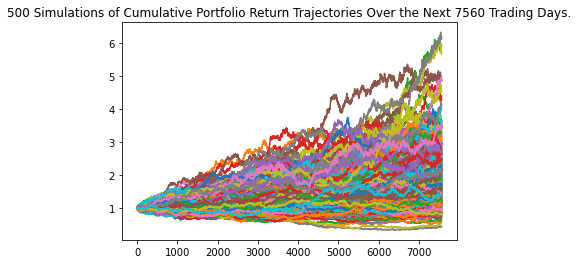

In [211]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# Plot simulation outcomes
MC_sim_line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

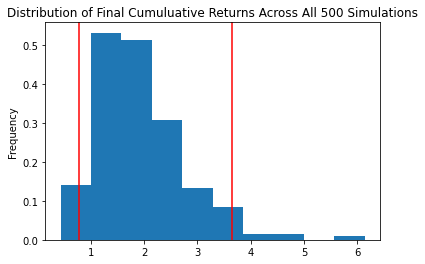

In [213]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future use
#MC_sim_dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [214]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              1.934888
std               0.829951
min               0.434936
25%               1.345831
50%               1.780129
75%               2.354013
max               6.142362
95% CI Lower      0.781430
95% CI Upper      3.644129
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [215]:
# Print the current balance of the stock and bond portion of the members portfolio
print(tot_holdings_val)


$60,688.70


In [217]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return =  MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return =  MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
lower_cumltv_return = "${:,.2f}".format(ci_lower_thirty_cumulative_return)
upper_cumltv_return = "${:,.2f}".format(ci_upper_thirty_cumulative_return)

print(f"There is a 95% chance that an initial investment of {tot_holdings_val} in the portfolio")
print(f"over the next 30 years will end within in the range of {lower_cumltv_return} and {upper_cumltv_return} ")


There is a 95% chance that an initial investment of $60,688.70 in the portfolio
over the next 5 years will end within in the range of $47,423.99 and $221,157.44 


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [219]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_ten_year.portfolio_data.head()



AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.40  2143773   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00       15562  108.754152          NaN  209.42   
2015-12-02 05:00:00+00:00       11581  108.684692    -0.001378  210.60   
2015-12-03 05:00:00+00:00       16801  108.040315    -0.007178  208.90   
2015-12-04 05:00:00+00:00        9796  108.192232     0.003244  206.10   
2015-12-07 05:00:00+00:00        9104  108.460067     0.001478  209.20   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2015-12-01 05:00:00+00:00  210.8200  209.1100  210.68   97858418      337780   
2015-12-02 05:00:00+00:00  211.0000  208.2300  208.54  108069059      367013   
2015-12-03 05:00:00+00:00  209.1500  204.7511  205.58  166224154      546768   
2015-12-04 05:00:00+00:00  209.9700  205.9300  209.66  192878747      556731   
2015-12-07 05:00:00+00:00  209.7295  207.2000  208.27  102027111      374705   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  209.921410          NaN  
2015-12-02 05:00:00+00:00  209.563055    -0.010158  
2015-12-03 05:00:00+00:00  206.878936    -0.014194  
2015-12-04 05:00:00+00:00  208.178631     0.019846  
2015-12-07 05:00:00+00:00  208.276128    -0.006630

In [220]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/comdrpaquiot/Desktop/Fintech-WorkSpace/Python_Project/Mod5_Challenge/GitHub_Uploader/Challenge5_FinancialPlanning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001996,1.002826,0.997476,1.002529,1.000997,0.995456,1.005885,0.998914,1.000563,1.001268,...,1.006260,1.003151,1.000614,0.996284,1.004947,1.006713,0.998164,1.003474,1.002156,0.999479
2,1.003022,0.998928,0.995606,1.000174,0.998829,0.995395,1.006507,1.000087,1.003424,1.003162,...,1.012074,1.004880,0.998521,0.993953,1.015243,1.008627,1.006313,1.001656,1.002674,0.996028
3,1.001654,1.000618,0.991449,1.001103,1.001637,0.995827,1.009066,0.997249,1.006752,1.004234,...,1.009399,1.005646,1.000018,0.992299,1.017224,1.010538,1.007105,0.998970,1.000418,0.996833
4,0.997948,1.001974,0.990061,1.001054,0.997467,0.997374,1.008653,1.003303,1.007684,1.008195,...,1.005372,1.005334,1.000705,0.990215,1.017017,1.008011,1.013148,0.998100,1.005241,0.999292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.262176,1.499660,1.168768,1.161150,1.481129,1.697437,1.234175,1.486514,1.200787,1.114178,...,1.120010,1.611631,1.601934,1.384206,1.472724,1.435029,1.319988,1.255970,1.399747,1.369451
2517,1.258543,1.503087,1.166365,1.162796,1.481472,1.699343,1.234229,1.494686,1.193864,1.112011,...,1.117217,1.611016,1.603360,1.381922,1.475802,1.433202,1.327488,1.259867,1.398071,1.370947
2518,1.260777,1.500234,1.164549,1.164125,1.490087,1.704825,1.236687,1.493343,1.195503,1.112368,...,1.115073,1.611674,1.599681,1.386791,1.475279,1.436890,1.326311,1.267081,1.398302,1.368808
2519,1.264765,1.499056,1.168827,1.160263,1.492501,1.706832,1.236531,1.498308,1.194134,1.109872,...,1.116673,1.611887,1.595173,1.382228,1.472086,1.441390,1.320130,1.267262,1.397987,1.375935


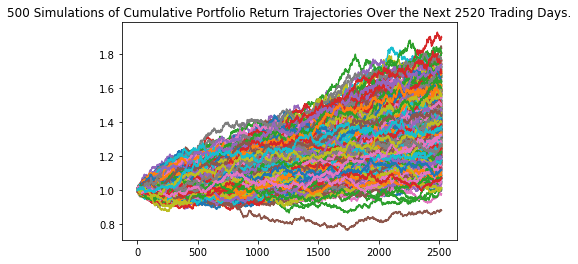

In [221]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot_2nd = MC_ten_year.plot_simulation()


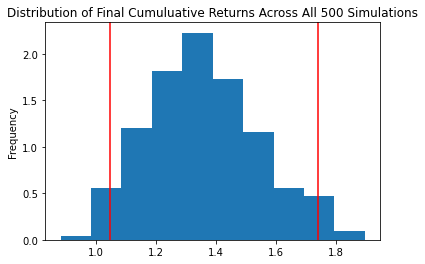

In [222]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot_2nd = MC_ten_year.plot_distribution()


In [223]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_2nd = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_2nd)

count           500.000000
mean              1.361165
std               0.183951
min               0.881066
25%               1.226060
50%               1.353608
75%               1.477290
max               1.896707
95% CI Lower      1.045778
95% CI Upper      1.738758
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [225]:
# Print the current balance of the stock and bond portion of the members portfolio
print(tot_holdings_val)


$60,688.70


In [228]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics_2nd[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_statistics_2nd[9] * total_stocks_bonds


# Print the result of your calculations
lower_cumltv_return_10y = "${:,.2f}".format(ci_lower_ten_cumulative_return)
upper_cumltv_return_10y = "${:,.2f}".format(ci_upper_ten_cumulative_return)

print(f"There is a 95% chance that an initial investment of {tot_holdings_val} in the portfolio")
print(f"over the next 30 years will end within in the range of {lower_cumltv_return_10y} and {upper_cumltv_return_10y} ")




There is a 95% chance that an initial investment of $60,688.70 in the portfolio
over the next 30 years will end within in the range of $63,466.93 and $105,522.98 


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [229]:
print(f"Initial lower estimation {lower_cumltv_return}, Final lower estimation {lower_cumltv_return_10y}")
print(f"Initial upper estimation {upper_cumltv_return}, Final upper estimation {upper_cumltv_return_10y }")

Initial lower estimation $47,423.99, Final lower estimation $63,466.93
Initial upper estimation $221,157.44, Final upper estimation $105,522.98
